FIAP - Tecnólogo de Inteligência Artificial

# Checkpoint 05

Faça o exercício abaixo <font color="red">em grupos de até 4 pessoas</font>, para praticar o uso do `sklearn avançado` em Machine Learning. Utilize os conceitos vistos em aula, e consulte [documentações](https://scikit-learn.org/stable/) na internet. Em caso de dúvidas, contate o Prof. Michel. 

**Entrega**: 13/outubro/2022, via Teams. 

**Apresentação**: utilizaremos a aula de 13/outubro para apresentação dos trabalhos e rodada de feedbacks! 


## Apresentação do trabalho

Neste checkpoint vamos trabalhar com modelagem de dados utilizando os recursos avançados do `sklearn`. 

Isso implica o uso de:  

- Tratamento de missing
- Identificação e tratamento de outliers
- Feature engineering (redução de dimensionalidade, padronização, encoder, etc)
- Lidar com desbalanceamento de dados 
- Seleção de modelos pertinentes ao problema elencado (regressão x classificação)
- Otimização de hiperparâmetros 
- Validação cruzada
- Escolha de métricas pertinentes
- Pipelines 
- Interpretabilidade dos resultados 

**Dataset**: vocês estão livres para escolher um dataset de interesse do grupo. Com o que gostariam de trabalhar? Saúde? Varejo? Jogos? Agronegócio? Finanças? Escolham uma base pública do Kaggle e sejam felizes. =) 

**Critérios de avaliação**: A correção do checkpoint será feita mediante os seguintes critérios:
- completude do pipeline 
- emprego correto dos conceitos de machine learning vistos em sala de aula 
- apresentação do dia 13/outubro (análise/justificativas dos resultados)


---



### Nome: Henrico Nardelli Bela - RM: 95985

---

# Escolha do dataset

Podemos começar analisando o nosso dataset, o escolhido da vez foi: Preços de Laptops
LINK: https://www.kaggle.com/datasets/muhammetvarl/laptop-price


---

## Sobre o dataset

Este dataset trata-se de uma base retirada de uma pesquisa europeia para com os preços de notebooks.

Consiste em apresentar a marca, sistema operacional, peso, tipo de notebook, e especificações do produto.


### Colunas
- 1 Company- String -Laptop Manufacturer<br>
- 2 Product -String -Brand and Model<br>
- 3 TypeName -String -Type (Notebook, Ultrabook, Gaming, etc.)<br>
- 4 Inches -Numeric- Screen Size<br>
- 5 ScreenResolution -String- Screen Resolution<br>
- 6 Cpu- String -Central Processing Unit (CPU)<br>
- 7 Ram -String- Laptop RAM<br>
- 8 Memory -String- Hard Disk / SSD Memory<br>
- 9 GPU -String- Graphics Processing Units (GPU)<br>
- 10 OpSys -String- Operating System<br>
- 11 Weight -String- Laptop Weight<br>
- 12 Price_euros -Numeric- Price (Euro)<br>

---

# Vamos lá!

---

### 1º precisamos importar nossas bibliotecas a serem utilizadas

#### Imports

In [468]:
import pandas as pd
import numpy as np
import re
import random

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, ShuffleSplit

import eli5
import lime
import lime.lime_tabular
import shap

# from subprocess import call
# from IPython.display import Image

import warnings

warnings.filterwarnings("ignore")

---

### 2º precisamos ler a nossa base de dados

#### Ler um CSV, e tambem definir o enconding para latin america

In [113]:
df = pd.read_csv("laptop_price.csv", encoding="latin -1")

Uma pequena amostra

In [114]:
df.sample(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
418,425,Dell,Inspiron 3567,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.14kg,539.95
1241,1259,Asus,ZenBook UX310UA-WB71,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.45kg,1280.00
1013,1027,HP,EliteBook 840,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.54kg,1887.21
1175,1193,Asus,UX410UA-GV097T (i3-7100U/4GB/256GB/FHD/W10),Notebook,14.0,Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,2kg,769.00


---

### 3° Exploração

In [115]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [116]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [117]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
laptop_ID,1303.0,660.155794,381.172104,1.0,331.5,659.0,990.50,1320.0
Inches,1303.0,15.017191,1.426304,10.1,14.0,15.6,15.60,18.4
Price_euros,1303.0,1123.686992,699.009043,174.0,599.0,977.0,1487.88,6099.0


In [118]:
df.isna().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [119]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [120]:
df.head(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [121]:
df.tail(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.0
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.0
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.0
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.0
1302,1320,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,369.0


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [123]:
for col in df:
    print(f"Coluna: {col}\nContagens da coluna {col}: \n{df[col].value_counts()}\n\n\n")

Coluna: laptop_ID
Contagens da coluna laptop_ID: 
1       1
867     1
885     1
884     1
883     1
       ..
440     1
439     1
438     1
437     1
1320    1
Name: laptop_ID, Length: 1303, dtype: int64



Coluna: Company
Contagens da coluna Company: 
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64



Coluna: Product
Contagens da coluna Product: 
XPS 13                                     30
Inspiron 3567                              29
250 G6                                     21
Legion Y520-15IKBN                         19
Vostro 3568                                19
                                           ..
15-bw007nv (A10-9620P/6GB/128GB/Radeon      1
SmartBook 130            

In [124]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [125]:
print(f"Media de polegadas dos notebooks: {round(df.Inches.mean(), 2)}")
print(f"Media de preço dos notebooks em euros: {round(df.Price_euros.mean(), 2)}")
# print(f"Media de Peso dos notebooks: {round(df.Weight.mean(), 2)}")               # necessario limpeza para visualização

Media de polegadas dos notebooks: 15.02
Media de preço dos notebooks em euros: 1123.69


In [126]:
round(df.describe().loc[["mean", "min", "max"]], 2)

,laptop_ID,Inches,Price_euros
mean,660.16,15.02,1123.69
min,1.00,10.10,174.00
max,1320.00,18.40,6099.00


In [127]:
df.max()

laptop_ID                                    1320
Company                                    Xiaomi
Product                    Zenbook UX510UW-FI095T
TypeName                              Workstation
Inches                                       18.4
ScreenResolution            Touchscreen 2560x1440
Cpu                 Samsung Cortex A72&A53 2.0GHz
Ram                                           8GB
Memory                                    8GB SSD
Gpu                           Nvidia Quadro M620M
OpSys                                       macOS
Weight                                        4kg
Price_euros                                6099.0
dtype: object

In [128]:
df.min()

laptop_ID                                           1
Company                                          Acer
Product             110-15ACL (A6-7310/4GB/500GB/W10)
TypeName                           2 in 1 Convertible
Inches                                           10.1
ScreenResolution                             1366x768
Cpu                       AMD A10-Series 9600P 2.4GHz
Ram                                              12GB
Memory                                      1.0TB HDD
Gpu                                AMD FirePro W4190M
OpSys                                         Android
Weight                                         0.69kg
Price_euros                                     174.0
dtype: object

#### Após o Data Mining podemos identificar que:

- O dataset nao apresenta valores nulos ou faltantes
- A media de preço dos laptops fica em torno de 1200 euros
- Os notebooks mais vendidos são das marcas Dell, e Lenovo.
- Há uma grande discrepancia de quantidade entre os Notebooks convencionais e os Notebooks Gamer. 
- A media de polegadas dos notebooks da base fica em 15.02
- O equipamento mais caro é um Xiaomi Zenbook UX510UW-FI095T, que é uma workstation (Será que vale a pena mesmo?)
- O equipamento mais barato é um Acer 110-15ACL, que é 2 in 1 Convertible.


---

### 4º Limpeza

In [129]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [130]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [131]:
df = df.drop(columns=["laptop_ID"])

In [132]:
df.head(1)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69


In [133]:
df = df.rename(
    columns={
        "Company": "Empresa",
        "Product": "Equipamento",
        "TypeName": "Tipo",
        "Inches": "Polegadas",
        "ScreenResolution": "Resolucao_Tela",
        "Memory": "Armazenamento",
        "OpSys": "Sistema_Operacional",
        "Weight": "Peso",
        "Price_euros": "Preco_Em_Euros",
    }
)

In [134]:
df = df.rename(columns=str.lower)

In [135]:
df.tail(2)

,empresa,equipamento,tipo,polegadas,resolucao_tela,cpu,ram,armazenamento,gpu,sistema_operacional,peso,preco_em_euros
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.0
1302,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,369.0


In [136]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1298     True
1299     True
1300     True
1301     True
1302     True
Length: 1303, dtype: bool

In [137]:
df = df.drop_duplicates()

In [138]:
df

,empresa,equipamento,tipo,polegadas,resolucao_tela,cpu,ram,armazenamento,gpu,sistema_operacional,peso,preco_em_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [139]:
for col in df:
    print(f"Coluna: {col}\nExemplos da coluna {col}: \n{df[col].sample(5)}\n\n\n")

Coluna: empresa
Exemplos da coluna empresa: 
387       Dell
422         HP
463     Lenovo
150       Dell
1030        HP
Name: empresa, dtype: object



Coluna: equipamento
Exemplos da coluna equipamento: 
728          Inspiron 5567
218          Latitude 5490
767          Inspiron 7559
898            Vostro 3568
1048    IdeaPad Y900-17ISK
Name: equipamento, dtype: object



Coluna: tipo
Exemplos da coluna tipo: 
70              Ultrabook
950           Workstation
482              Notebook
314    2 in 1 Convertible
803              Notebook
Name: tipo, dtype: object



Coluna: polegadas
Exemplos da coluna polegadas: 
1105    12.5
851     15.6
809     15.6
783     15.6
835     15.6
Name: polegadas, dtype: float64



Coluna: resolucao_tela
Exemplos da coluna resolucao_tela: 
852               Full HD 1920x1080
935               Full HD 1920x1080
296               Full HD 1920x1080
889                        1600x900
1220    IPS Panel Full HD 1920x1080
Name: resolucao_tela, dtype: object




Podemos identificar que há uma boa discrepancia nas classificacoes de resolução dos equipamentos, para resolver este problema, precisaremos separa-los em outras colunas.

In [140]:
df["resolucao"] = df["resolucao_tela"].str.extract(r"(\d+x\d+)")

In [141]:
df["touch"] = (
    df["resolucao_tela"].str.extract(r"(Touchscreen)", re.IGNORECASE).fillna("Nao")
)
df["touch"] = df["touch"].replace("Touchscreen", "Sim")

In [142]:
df["ips"] = (
    df["resolucao_tela"].str.extract(r"(IPS Panel)", re.IGNORECASE).fillna("Nao")
)
df["ips"] = df["ips"].replace("IPS Panel", "Sim")

In [143]:
df.touch.value_counts()

Nao    1087
Sim     188
Name: touch, dtype: int64

In [144]:
df.ips.value_counts()

Nao    918
Sim    357
Name: ips, dtype: int64

Após essa limpeza, não precisamos mais da coluna resolucao_tela, apenas excluir agora

In [145]:
df = df.drop(columns=["resolucao_tela"])

In [146]:
df

,empresa,equipamento,tipo,polegadas,cpu,ram,armazenamento,gpu,sistema_operacional,peso,preco_em_euros,resolucao,touch,ips
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560x1600,Nao,Sim
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440x900,Nao,Nao
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920x1080,Nao,Nao
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880x1800,Nao,Sim
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560x1600,Nao,Sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00,1920x1080,Sim,Sim
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,3200x1800,Sim,Sim
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00,1366x768,Nao,Nao
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00,1366x768,Nao,Nao


---

Faremos o mesmo para as colunas RAM, Peso

In [147]:
df["ram"] = df["ram"].str.replace("GB", "")
df["peso"] = df["peso"].str.replace("kg", "")

df["ram"] = df["ram"].astype(int)
df["peso"] = df["peso"].astype(float)

In [148]:
df

,empresa,equipamento,tipo,polegadas,cpu,ram,armazenamento,gpu,sistema_operacional,peso,preco_em_euros,resolucao,touch,ips
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2560x1600,Nao,Sim
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,1440x900,Nao,Nao
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,1920x1080,Nao,Nao
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,2880x1800,Nao,Sim
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,2560x1600,Nao,Sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00,1920x1080,Sim,Sim
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.00,3200x1800,Sim,Sim
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00,1366x768,Nao,Nao
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00,1366x768,Nao,Nao


---

O mesmo para CPU

In [149]:
df["cpu_frq(GHz)"] = df["cpu"].str.extract(r"(\d+(?:\.\d+)\s*GHz)")

df["cpu_frq(GHz)"] = df["cpu_frq(GHz)"].str.replace("GHz", "")
df["cpu_frq(GHz)"] = df["cpu_frq(GHz)"].astype(float)

df["cpu_brand"] = df["cpu"].str.extract(r"^([\w\-]+)")

In [150]:
df

,empresa,equipamento,tipo,polegadas,cpu,ram,armazenamento,gpu,sistema_operacional,peso,preco_em_euros,resolucao,touch,ips,cpu_frq(GHz),cpu_brand
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2560x1600,Nao,Sim,2.3,Intel
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,1440x900,Nao,Nao,1.8,Intel
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,1920x1080,Nao,Nao,2.5,Intel
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,2880x1800,Nao,Sim,2.7,Intel
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,2560x1600,Nao,Sim,3.1,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00,1920x1080,Sim,Sim,2.5,Intel
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.00,3200x1800,Sim,Sim,2.5,Intel
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00,1366x768,Nao,Nao,1.6,Intel
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00,1366x768,Nao,Nao,2.5,Intel


---

O mesmo para armazenamento

Primeiro convertemos todos em GB

In [151]:
df["armazenamento"] = df["armazenamento"].str.replace("2TB", "2000GB")
df["armazenamento"] = df["armazenamento"].str.replace("1.0TB", "1TB", regex=True)
df["armazenamento"] = df["armazenamento"].str.replace("1TB", "1000GB")

Alguns equipamentos possuem mais de um tipo de armazenamento. Será necessario separa-los.

In [152]:
df[["armazenamento_tipo1", "armazenamento_tipo2"]] = df["armazenamento"].str.split(
    "+", expand=True
)

In [153]:
df["capacidade_armazenamento1"] = df["armazenamento"].str.extract(r"([\d. +-/]+)\s*GB")
df["armazenamento_tipo1"] = df["armazenamento_tipo1"].str.replace(
    r"([\d. +-/]+)\s*GB", "", regex=True
)

df["capacidade_armazenamento2"] = df["armazenamento_tipo2"].str.extract(
    r"([\d. +-/]+)\s*GB"
)
df["armazenamento_tipo2"] = df["armazenamento_tipo2"].str.replace(
    r"([\d. +-/]+)\s*GB", "", regex=True
)

df["capacidade_armazenamento1"] = df["capacidade_armazenamento1"].astype(float)
df["capacidade_armazenamento2"] = df["capacidade_armazenamento2"].astype(float)

In [159]:
df["armazenamento_tipo2"].value_counts()

 HDD       202
 SSD         4
 Hybrid      2
Name: armazenamento_tipo2, dtype: int64

In [154]:
df["capacidade_armazenamento2"] = df["capacidade_armazenamento2"].replace(
    {"NaN": np.nan}
)
df["capacidade_armazenamento2"] = df["capacidade_armazenamento2"].fillna(0)

In [158]:
df["capacidade_armazenamento2"].value_counts()

0.0       1067
1000.0     187
2000.0      15
256.0        3
500.0        2
512.0        1
Name: capacidade_armazenamento2, dtype: int64

In [156]:
df = df.drop(["armazenamento"], axis=1)

In [157]:
df

,empresa,equipamento,tipo,polegadas,cpu,ram,gpu,sistema_operacional,peso,preco_em_euros,resolucao,touch,ips,cpu_frq(GHz),cpu_brand,armazenamento_tipo1,armazenamento_tipo2,capacidade_armazenamento1,capacidade_armazenamento2
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2560x1600,Nao,Sim,2.3,Intel,SSD,None,128.0,0.0
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,1440x900,Nao,Nao,1.8,Intel,Flash Storage,None,128.0,0.0
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,575.00,1920x1080,Nao,Nao,2.5,Intel,SSD,None,256.0,0.0
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,2537.45,2880x1800,Nao,Sim,2.7,Intel,SSD,None,512.0,0.0
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,2560x1600,Nao,Sim,3.1,Intel,SSD,None,256.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,Intel HD Graphics 520,Windows 10,1.80,638.00,1920x1080,Sim,Sim,2.5,Intel,SSD,None,128.0,0.0
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,Intel HD Graphics 520,Windows 10,1.30,1499.00,3200x1800,Sim,Sim,2.5,Intel,SSD,None,512.0,0.0
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,Intel HD Graphics,Windows 10,1.50,229.00,1366x768,Nao,Nao,1.6,Intel,Flash Storage,None,64.0,0.0
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,AMD Radeon R5 M330,Windows 10,2.19,764.00,1366x768,Nao,Nao,2.5,Intel,HDD,None,1000.0,0.0


O mesmo para GPU

In [160]:
df["gpu_brand"] = df["gpu"].str.extract(r"^([\w\-]+)")

In [161]:
df

,empresa,equipamento,tipo,polegadas,cpu,ram,gpu,sistema_operacional,peso,preco_em_euros,resolucao,touch,ips,cpu_frq(GHz),cpu_brand,armazenamento_tipo1,armazenamento_tipo2,capacidade_armazenamento1,capacidade_armazenamento2,gpu_brand
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2560x1600,Nao,Sim,2.3,Intel,SSD,None,128.0,0.0,Intel
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,1440x900,Nao,Nao,1.8,Intel,Flash Storage,None,128.0,0.0,Intel
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,575.00,1920x1080,Nao,Nao,2.5,Intel,SSD,None,256.0,0.0,Intel
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,2537.45,2880x1800,Nao,Sim,2.7,Intel,SSD,None,512.0,0.0,AMD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,2560x1600,Nao,Sim,3.1,Intel,SSD,None,256.0,0.0,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,Intel HD Graphics 520,Windows 10,1.80,638.00,1920x1080,Sim,Sim,2.5,Intel,SSD,None,128.0,0.0,Intel
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,Intel HD Graphics 520,Windows 10,1.30,1499.00,3200x1800,Sim,Sim,2.5,Intel,SSD,None,512.0,0.0,Intel
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,Intel HD Graphics,Windows 10,1.50,229.00,1366x768,Nao,Nao,1.6,Intel,Flash Storage,None,64.0,0.0,Intel
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,AMD Radeon R5 M330,Windows 10,2.19,764.00,1366x768,Nao,Nao,2.5,Intel,HDD,None,1000.0,0.0,AMD


---

O mesmo para sistema operacional

In [162]:
df["sistema_operacional"] = df["sistema_operacional"].replace(
    {
        "Windows 10": "Windows",
        "Windows 10 S": "Windows",
        "Windows 7": "Windows",
        "Mac OS X": "macOS",
    }
)

In [163]:
df

,empresa,equipamento,tipo,polegadas,cpu,ram,gpu,sistema_operacional,peso,preco_em_euros,resolucao,touch,ips,cpu_frq(GHz),cpu_brand,armazenamento_tipo1,armazenamento_tipo2,capacidade_armazenamento1,capacidade_armazenamento2,gpu_brand
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2560x1600,Nao,Sim,2.3,Intel,SSD,None,128.0,0.0,Intel
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,1440x900,Nao,Nao,1.8,Intel,Flash Storage,None,128.0,0.0,Intel
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,575.00,1920x1080,Nao,Nao,2.5,Intel,SSD,None,256.0,0.0,Intel
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,2537.45,2880x1800,Nao,Sim,2.7,Intel,SSD,None,512.0,0.0,AMD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,2560x1600,Nao,Sim,3.1,Intel,SSD,None,256.0,0.0,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,Intel HD Graphics 520,Windows,1.80,638.00,1920x1080,Sim,Sim,2.5,Intel,SSD,None,128.0,0.0,Intel
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,Intel HD Graphics 520,Windows,1.30,1499.00,3200x1800,Sim,Sim,2.5,Intel,SSD,None,512.0,0.0,Intel
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,Intel HD Graphics,Windows,1.50,229.00,1366x768,Nao,Nao,1.6,Intel,Flash Storage,None,64.0,0.0,Intel
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,AMD Radeon R5 M330,Windows,2.19,764.00,1366x768,Nao,Nao,2.5,Intel,HDD,None,1000.0,0.0,AMD


* Esta parte do codigo tive que tirar da internet, pois estava com muita dificuldade na parte das regex, qual regex utilizar etc. 

Segue o link de onde tirei os codigos: https://www.kaggle.com/code/madleenhammad/eda-and-choosing-the-best-predictive-model

---

### 5º Engenharia de features

In [164]:
df

,empresa,equipamento,tipo,polegadas,cpu,ram,gpu,sistema_operacional,peso,preco_em_euros,resolucao,touch,ips,cpu_frq(GHz),cpu_brand,armazenamento_tipo1,armazenamento_tipo2,capacidade_armazenamento1,capacidade_armazenamento2,gpu_brand
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2560x1600,Nao,Sim,2.3,Intel,SSD,None,128.0,0.0,Intel
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,1440x900,Nao,Nao,1.8,Intel,Flash Storage,None,128.0,0.0,Intel
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,575.00,1920x1080,Nao,Nao,2.5,Intel,SSD,None,256.0,0.0,Intel
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,2537.45,2880x1800,Nao,Sim,2.7,Intel,SSD,None,512.0,0.0,AMD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,2560x1600,Nao,Sim,3.1,Intel,SSD,None,256.0,0.0,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,Intel HD Graphics 520,Windows,1.80,638.00,1920x1080,Sim,Sim,2.5,Intel,SSD,None,128.0,0.0,Intel
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,Intel HD Graphics 520,Windows,1.30,1499.00,3200x1800,Sim,Sim,2.5,Intel,SSD,None,512.0,0.0,Intel
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,Intel HD Graphics,Windows,1.50,229.00,1366x768,Nao,Nao,1.6,Intel,Flash Storage,None,64.0,0.0,Intel
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,AMD Radeon R5 M330,Windows,2.19,764.00,1366x768,Nao,Nao,2.5,Intel,HDD,None,1000.0,0.0,AMD


In [167]:
cotacao_euro = 5.16

In [170]:
df["preco_em_reais"] = round(df["preco_em_euros"] * cotacao_euro, 2)

In [171]:
df

,empresa,equipamento,tipo,polegadas,cpu,ram,gpu,sistema_operacional,peso,preco_em_euros,...,touch,ips,cpu_frq(GHz),cpu_brand,armazenamento_tipo1,armazenamento_tipo2,capacidade_armazenamento1,capacidade_armazenamento2,gpu_brand,preco_em_reais
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,...,Nao,Sim,2.3,Intel,SSD,None,128.0,0.0,Intel,6912.80
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,...,Nao,Nao,1.8,Intel,Flash Storage,None,128.0,0.0,Intel,4638.53
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,575.00,...,Nao,Nao,2.5,Intel,SSD,None,256.0,0.0,Intel,2967.00
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,2537.45,...,Nao,Sim,2.7,Intel,SSD,None,512.0,0.0,AMD,13093.24
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,...,Nao,Sim,3.1,Intel,SSD,None,256.0,0.0,Intel,9306.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,Intel HD Graphics 520,Windows,1.80,638.00,...,Sim,Sim,2.5,Intel,SSD,None,128.0,0.0,Intel,3292.08
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,Intel HD Graphics 520,Windows,1.30,1499.00,...,Sim,Sim,2.5,Intel,SSD,None,512.0,0.0,Intel,7734.84
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,Intel HD Graphics,Windows,1.50,229.00,...,Nao,Nao,1.6,Intel,Flash Storage,None,64.0,0.0,Intel,1181.64
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,AMD Radeon R5 M330,Windows,2.19,764.00,...,Nao,Nao,2.5,Intel,HDD,None,1000.0,0.0,AMD,3942.24


---

### 6º Visualização dos dados

In [172]:
df

,empresa,equipamento,tipo,polegadas,cpu,ram,gpu,sistema_operacional,peso,preco_em_euros,...,touch,ips,cpu_frq(GHz),cpu_brand,armazenamento_tipo1,armazenamento_tipo2,capacidade_armazenamento1,capacidade_armazenamento2,gpu_brand,preco_em_reais
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,...,Nao,Sim,2.3,Intel,SSD,None,128.0,0.0,Intel,6912.80
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,...,Nao,Nao,1.8,Intel,Flash Storage,None,128.0,0.0,Intel,4638.53
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,575.00,...,Nao,Nao,2.5,Intel,SSD,None,256.0,0.0,Intel,2967.00
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,2537.45,...,Nao,Sim,2.7,Intel,SSD,None,512.0,0.0,AMD,13093.24
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,...,Nao,Sim,3.1,Intel,SSD,None,256.0,0.0,Intel,9306.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,Intel HD Graphics 520,Windows,1.80,638.00,...,Sim,Sim,2.5,Intel,SSD,None,128.0,0.0,Intel,3292.08
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,Intel HD Graphics 520,Windows,1.30,1499.00,...,Sim,Sim,2.5,Intel,SSD,None,512.0,0.0,Intel,7734.84
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,Intel HD Graphics,Windows,1.50,229.00,...,Nao,Nao,1.6,Intel,Flash Storage,None,64.0,0.0,Intel,1181.64
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,AMD Radeon R5 M330,Windows,2.19,764.00,...,Nao,Nao,2.5,Intel,HDD,None,1000.0,0.0,AMD,3942.24


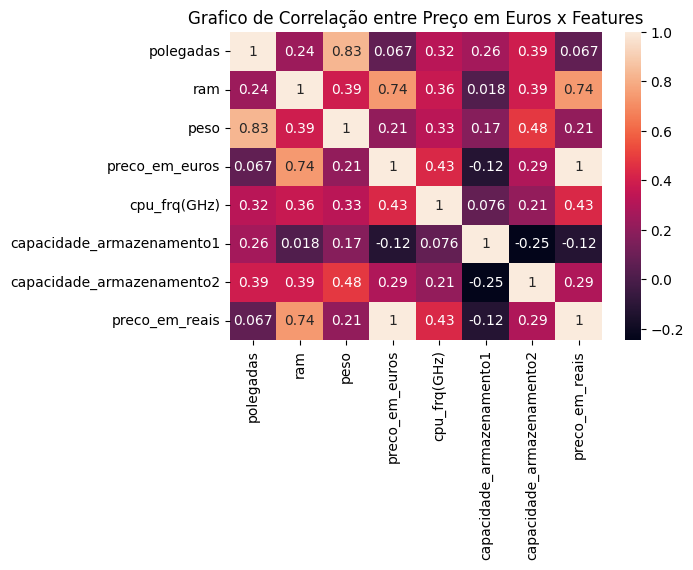

In [184]:
plt.figure(figsize=(6, 4))

sns.heatmap(df.corr(), annot=True)

plt.title("Grafico de Correlação entre Preço em Euros x Features", fontsize=12)

plt.show()

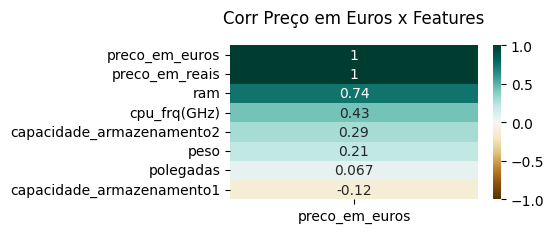

In [178]:
plt.figure(figsize=(4, 2))

corr = sns.heatmap(
    df.corr()[["preco_em_euros"]].sort_values(by="preco_em_euros", ascending=False),
    vmin=-1,
    vmax=1,
    cmap="BrBG",
    annot=True,
)

corr.set_title("Corr Preço em Euros x Features", fontdict={"fontsize": 12}, pad=16)

plt.show()

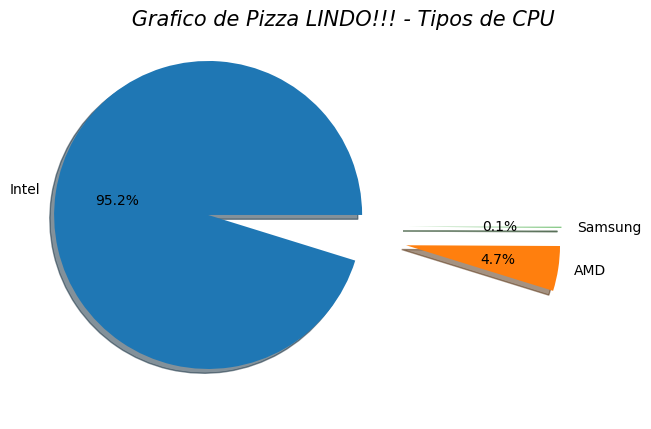

In [252]:
cpu_brand_count = df.cpu_brand.value_counts()

plt.figure(figsize=(6, 5))

explode = [0.5, 0.8, 0.8]

ax = cpu_brand_count.plot(
    kind="pie", rot=0, autopct="%1.1f%%", shadow=True, explode=explode
)

ax.set_title(
    "      Grafico de Pizza LINDO!!! - Tipos de CPU",
    fontsize=15,
    fontstyle="italic",
    loc="left",
)
ax.set_ylabel("")

plt.show()

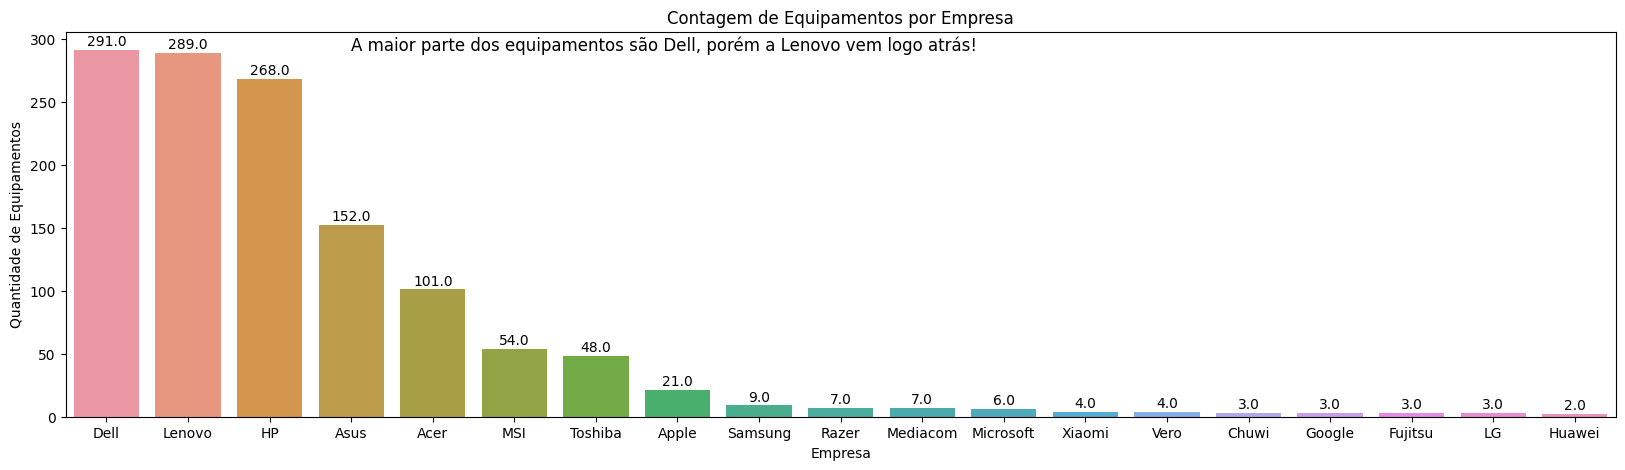

In [253]:
plt.figure(figsize=(20, 5))

plt.title("Contagem de Equipamentos por Empresa")

ax = sns.countplot(x="empresa", data=df, order=df.empresa.value_counts().index)

for patch in ax.patches:
    y_value = patch.get_height()
    x_value = patch.get_x() + patch.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(
        label,
        (x_value, y_value),
        xytext=(0, space),
        textcoords="offset points",
        ha="center",
        va="bottom",
    )

plt.ylabel("Quantidade de Equipamentos")
plt.xlabel("Empresa")

ax.text(
    3,
    291,
    "A maior parte dos equipamentos são Dell, porém a Lenovo vem logo atrás!",
    fontsize=12,
)

plt.show()

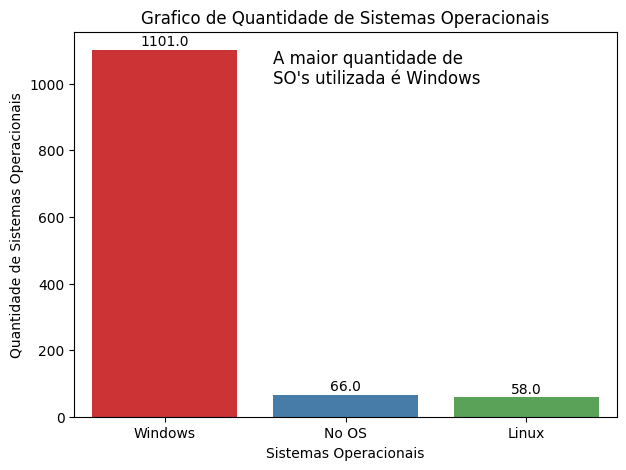

In [298]:
plt.figure(figsize=(7, 5))

sis = df["sistema_operacional"]
order = sis.value_counts().index

top3 = df.empresa.value_counts().index[0:3]

ax = sns.countplot(x=sis, order=order, data=df, palette="Set1")

plt.title("Grafico de Quantidade de Sistemas Operacionais", fontsize=12)
plt.xlabel("Sistemas Operacionais", fontsize=10)
plt.ylabel("Quantidade de Sistemas Operacionais", fontsize=10)
plt.xlim(-0.5, 2.5)

for patch in ax.patches:
    y_value = patch.get_height()
    x_value = patch.get_x() + patch.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(
        label,
        (x_value, y_value),
        xytext=(0, space),
        textcoords="offset points",
        ha="center",
        va="bottom",
    )

ax.text(0.60, 1000, "A maior quantidade de \nSO's utilizada é Windows", fontsize=12)

plt.show()

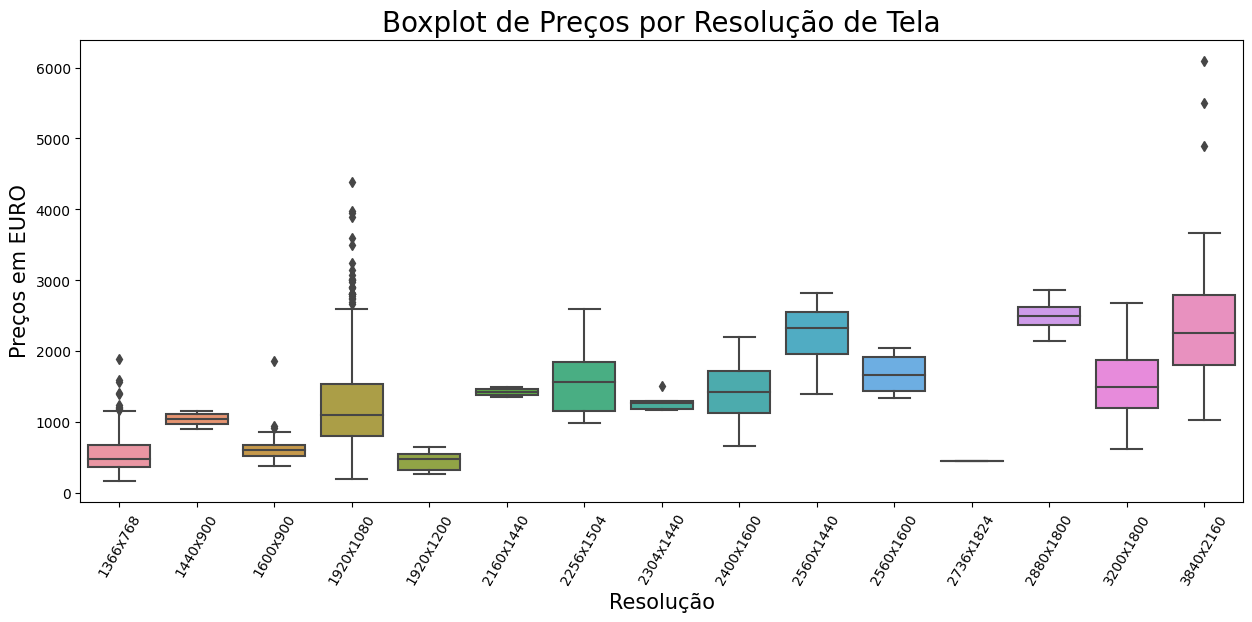

In [327]:
plt.figure(figsize=(15, 6))
plt.title("Boxplot de Preços por Resolução de Tela", fontsize=20)

sns.boxplot(
    x="resolucao",
    y="preco_em_euros",
    data=df,
    order=df.resolucao.sort_values().unique(),
)

plt.xlabel("Resolução", fontsize=15)
plt.ylabel("Preços em EURO", fontsize=15)
plt.xticks(rotation=60);

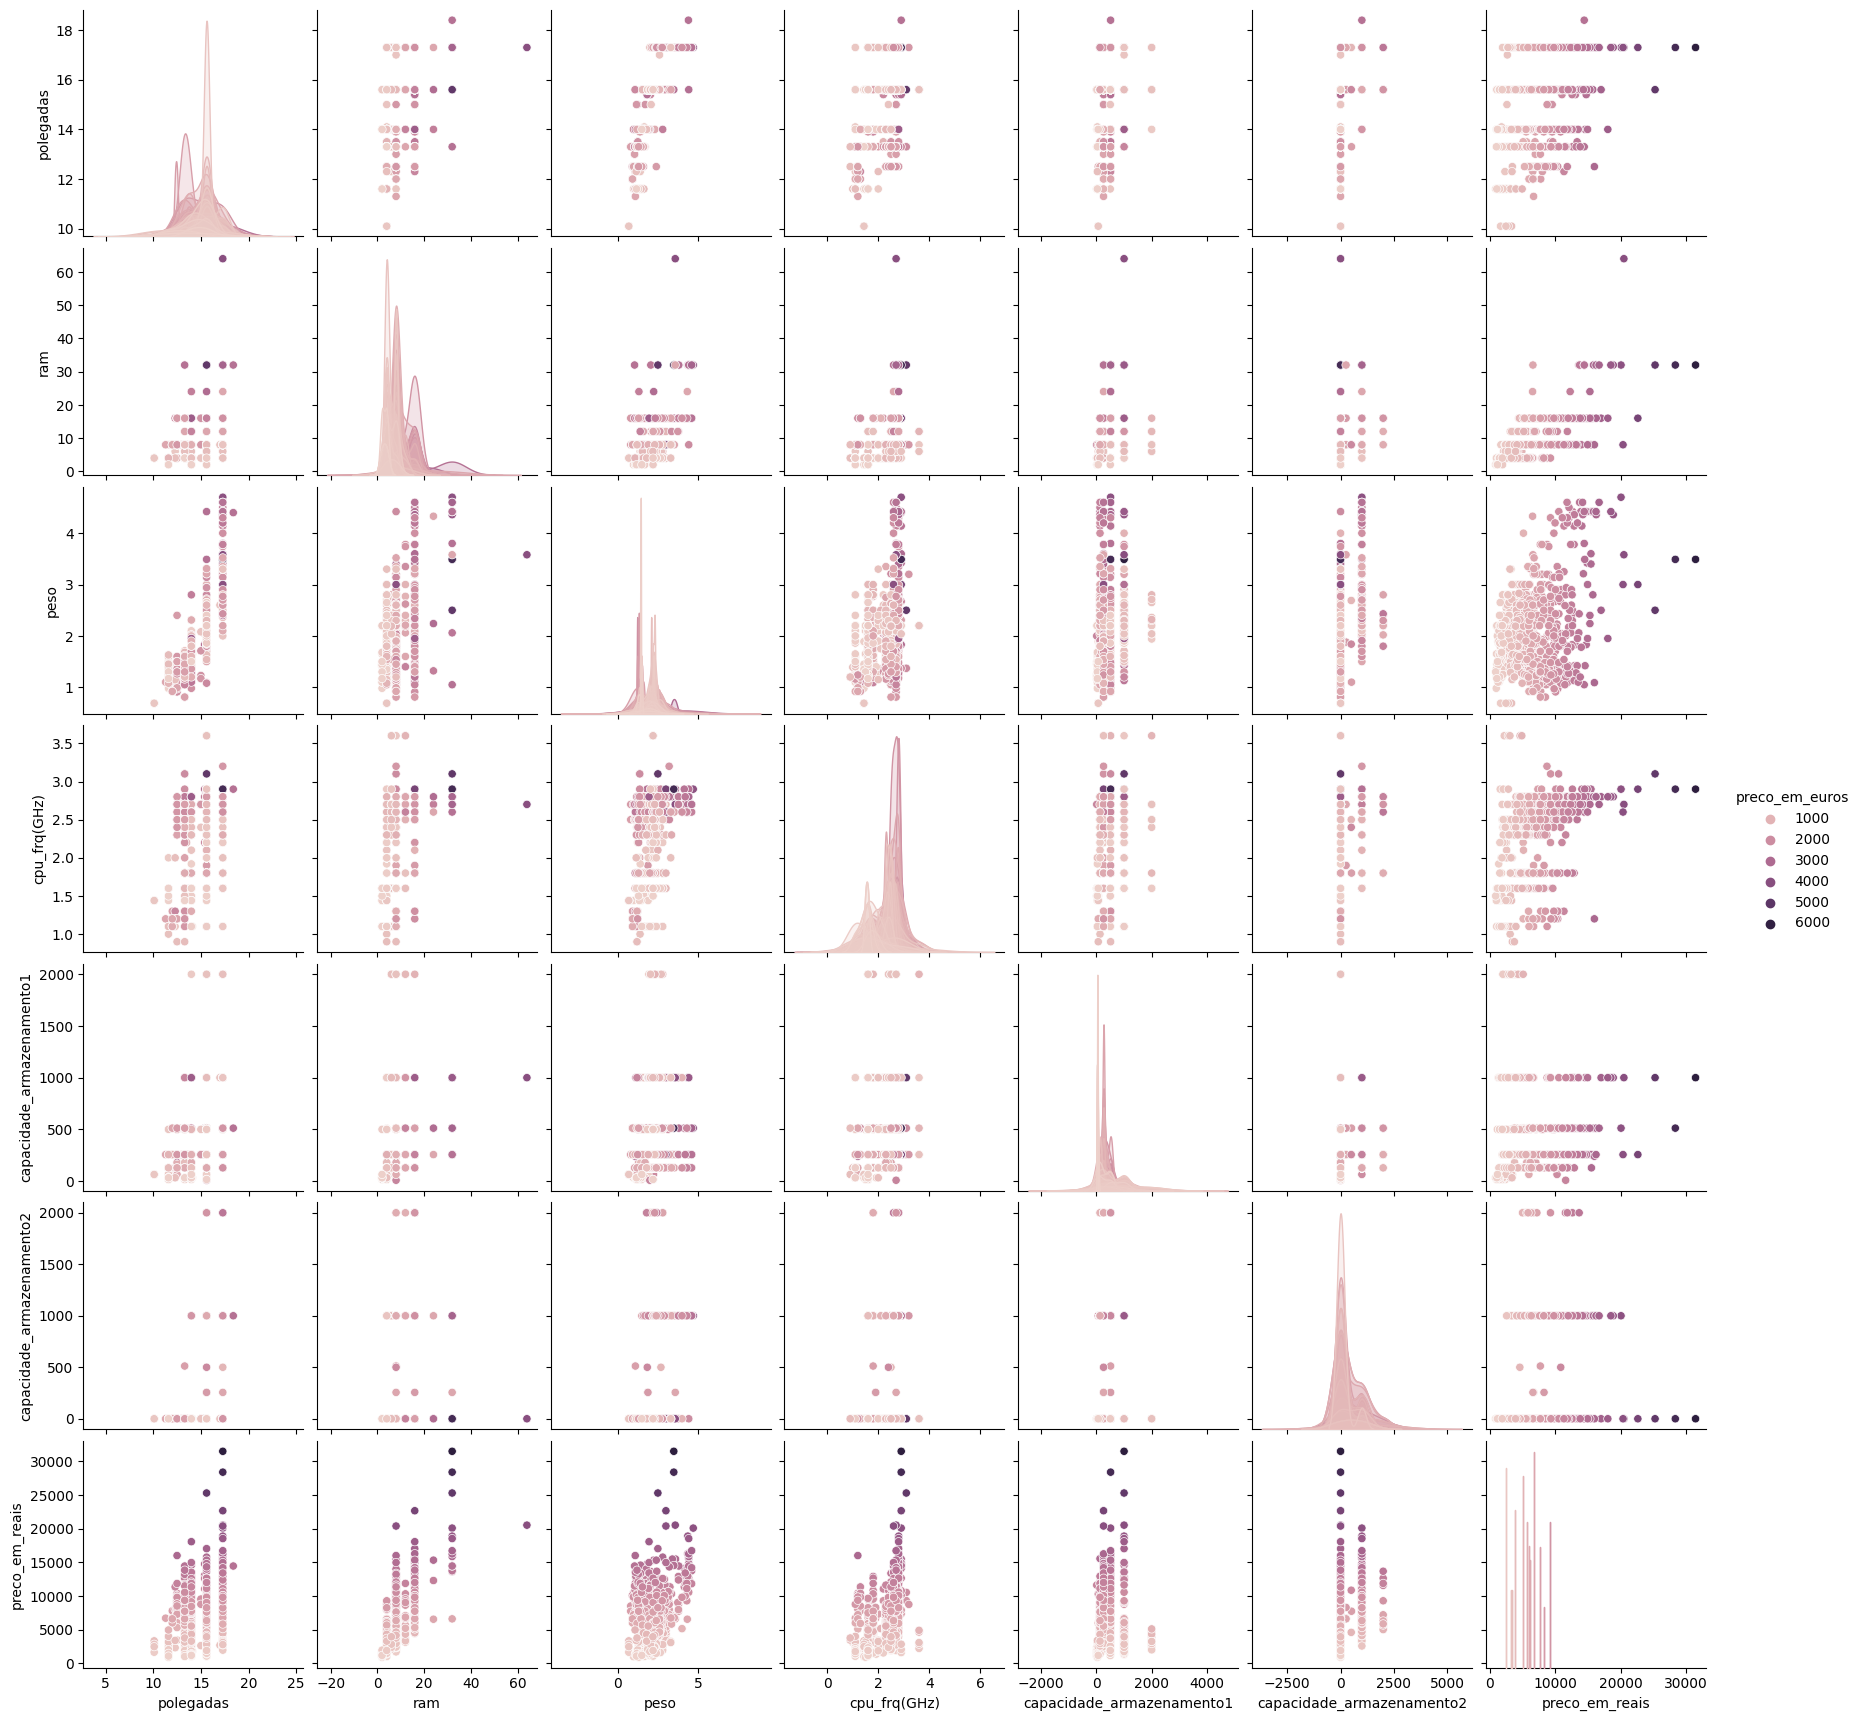

In [254]:
sns.pairplot(df, hue="preco_em_euros")
plt.show()

---

### 7º Modelando

In [329]:
df_copy = df.copy()

In [330]:
df_copy

,empresa,equipamento,tipo,polegadas,cpu,ram,gpu,sistema_operacional,peso,preco_em_euros,...,touch,ips,cpu_frq(GHz),cpu_brand,armazenamento_tipo1,armazenamento_tipo2,capacidade_armazenamento1,capacidade_armazenamento2,gpu_brand,preco_em_reais
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,...,Nao,Sim,2.3,Intel,SSD,None,128.0,0.0,Intel,6912.80
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,...,Nao,Nao,1.8,Intel,Flash Storage,None,128.0,0.0,Intel,4638.53
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,575.00,...,Nao,Nao,2.5,Intel,SSD,None,256.0,0.0,Intel,2967.00
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,2537.45,...,Nao,Sim,2.7,Intel,SSD,None,512.0,0.0,AMD,13093.24
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,...,Nao,Sim,3.1,Intel,SSD,None,256.0,0.0,Intel,9306.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,Intel HD Graphics 520,Windows,1.80,638.00,...,Sim,Sim,2.5,Intel,SSD,None,128.0,0.0,Intel,3292.08
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,Intel HD Graphics 520,Windows,1.30,1499.00,...,Sim,Sim,2.5,Intel,SSD,None,512.0,0.0,Intel,7734.84
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,Intel HD Graphics,Windows,1.50,229.00,...,Nao,Nao,1.6,Intel,Flash Storage,None,64.0,0.0,Intel,1181.64
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,AMD Radeon R5 M330,Windows,2.19,764.00,...,Nao,Nao,2.5,Intel,HDD,None,1000.0,0.0,AMD,3942.24


In [331]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 0 to 1274
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   empresa                    1275 non-null   object 
 1   equipamento                1275 non-null   object 
 2   tipo                       1275 non-null   object 
 3   polegadas                  1275 non-null   float64
 4   cpu                        1275 non-null   object 
 5   ram                        1275 non-null   int32  
 6   gpu                        1275 non-null   object 
 7   sistema_operacional        1275 non-null   object 
 8   peso                       1275 non-null   float64
 9   preco_em_euros             1275 non-null   float64
 10  resolucao                  1275 non-null   object 
 11  touch                      1275 non-null   object 
 12  ips                        1275 non-null   object 
 13  cpu_frq(GHz)               1189 non-null   float

Primeiro criamos uma copia do nosso dataset, e após, separamos as features categoricas das numericas

In [334]:
X = df_copy.drop(columns=["preco_em_euros", "preco_em_reais"])
y = df_copy["preco_em_euros"]

In [335]:
categorical_columns = []
numerical_columns = []

for column in X.columns:
    if X[column].dtype == "O":
        categorical_columns.append(column)
    elif X[column].dtype == "float64" or X[column].dtype == "int32":
        numerical_columns.append(column)

print(
    f"Categorical Columns: {categorical_columns}\n\nNumerical Columns: {numerical_columns}"
)

Categorical Columns: ['empresa', 'equipamento', 'tipo', 'cpu', 'gpu', 'sistema_operacional', 'resolucao', 'touch', 'ips', 'cpu_brand', 'armazenamento_tipo1', 'armazenamento_tipo2', 'gpu_brand']

Numerical Columns: ['polegadas', 'ram', 'peso', 'cpu_frq(GHz)', 'capacidade_armazenamento1', 'capacidade_armazenamento2']


In [336]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [337]:
x_train

,empresa,equipamento,tipo,polegadas,cpu,ram,gpu,sistema_operacional,peso,resolucao,touch,ips,cpu_frq(GHz),cpu_brand,armazenamento_tipo1,armazenamento_tipo2,capacidade_armazenamento1,capacidade_armazenamento2,gpu_brand
413,Acer,Aspire R7,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,8,Intel HD Graphics 520,Windows,1.60,1920x1080,Sim,Sim,2.50,Intel,SSD,None,256.0,0.0,Intel
778,Razer,Blade Pro,Gaming,14.0,Intel Core i7 7700HQ 2.8GHz,16,Nvidia GeForce GTX 1060,Windows,1.95,1920x1080,Nao,Nao,2.80,Intel,SSD,None,512.0,0.0,Nvidia
1107,Lenovo,Yoga 500-15ISK,2 in 1 Convertible,15.6,Intel Core i5 6200U 2.3GHz,4,Intel HD Graphics 520,Windows,2.10,1920x1080,Sim,Sim,2.30,Intel,SSD,None,256.0,0.0,Intel
96,Dell,Inspiron 3567,Notebook,15.6,Intel Core i7 7500U 2.7GHz,8,AMD Radeon R5 M430,Linux,2.20,1920x1080,Nao,Nao,2.70,Intel,HDD,None,1000.0,0.0,AMD
309,HP,250 G6,Notebook,15.6,Intel Core i3 6006U 2GHz,4,Intel HD Graphics 520,Windows,1.86,1920x1080,Nao,Nao,NaN,Intel,HDD,None,1000.0,0.0,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,HP,EliteBook 840,Notebook,14.0,Intel Core i5 6200U 2.3GHz,4,Intel HD Graphics 520,Windows,1.54,1920x1080,Nao,Nao,2.30,Intel,HDD,None,500.0,0.0,Intel
1095,Acer,Aspire F5-573G,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,Nvidia GeForce GTX 950M,Windows,2.40,1920x1080,Nao,Nao,2.50,Intel,SSD,HDD,256.0,1000.0,Nvidia
1130,HP,15-bs078cl (i7-7500U/8GB/2TB/W10),Notebook,15.6,Intel Core i7 7500U 2.7GHz,8,Intel HD Graphics 620,Windows,2.04,1366x768,Nao,Nao,2.70,Intel,HDD,None,2000.0,0.0,Intel
860,Lenovo,ThinkPad E570,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,Windows,2.30,1920x1080,Nao,Sim,2.50,Intel,HDD,None,1000.0,0.0,Intel


In [338]:
x_test

,empresa,equipamento,tipo,polegadas,cpu,ram,gpu,sistema_operacional,peso,resolucao,touch,ips,cpu_frq(GHz),cpu_brand,armazenamento_tipo1,armazenamento_tipo2,capacidade_armazenamento1,capacidade_armazenamento2,gpu_brand
1179,HP,ProBook 450,Notebook,15.6,Intel Core i3 6100U 2.3GHz,4,Intel HD Graphics 520,Windows,2.07,1366x768,Nao,Nao,2.3,Intel,HDD,None,500.0,0.0,Intel
342,HP,ProBook 450,Notebook,15.6,Intel Core i3 7100U 2.4GHz,8,Nvidia GeForce 930MX,Windows,2.10,1920x1080,Nao,Sim,2.4,Intel,HDD,None,1000.0,0.0,Nvidia
649,Lenovo,Thinkpad X270,Ultrabook,12.5,Intel Core i7 7500U 2.7GHz,8,Intel HD Graphics 620,Windows,1.36,1920x1080,Nao,Sim,2.7,Intel,SSD,None,256.0,0.0,Intel
772,Toshiba,Tecra A40-C-1E5,Notebook,14.0,Intel Core i5 6200U 2.3GHz,4,Intel HD Graphics 520,Windows,1.75,1366x768,Nao,Sim,2.3,Intel,SSD,None,128.0,0.0,Intel
803,Dell,XPS 15,Notebook,15.6,Intel Core i5 7300HQ 2.5GHz,8,Nvidia GeForce GTX 1050,Windows,2.06,3840x2160,Sim,Nao,2.5,Intel,SSD,None,256.0,0.0,Nvidia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,Lenovo,IdeaPad 320-15AST,Notebook,15.6,AMD A9-Series 9420 2.9GHz,4,AMD Radeon 530,Windows,2.20,1920x1080,Nao,Nao,2.9,AMD,SSD,None,256.0,0.0,AMD
1105,Dell,Latitude E5270,Ultrabook,12.5,Intel Core i5 6200U 2.3GHz,8,Intel HD Graphics 520,Windows,1.50,1366x768,Nao,Nao,2.3,Intel,SSD,None,256.0,0.0,Intel
424,Dell,Alienware 17,Gaming,17.3,Intel Core i7 7820HK 2.9GHz,16,Nvidia GeForce GTX 1070,Windows,4.42,2560x1440,Nao,Sim,2.9,Intel,SSD,HDD,256.0,1000.0,Nvidia
944,Lenovo,Yoga 700-11ISK,2 in 1 Convertible,11.3,Intel Core M m7-6Y75 1.2GHz,8,Intel HD Graphics 515,Windows,1.10,1920x1080,Sim,Sim,1.2,Intel,SSD,None,256.0,0.0,Intel


In [339]:
y_train

413      789.01
778     2899.00
1107     867.00
96       599.90
309      469.00
         ...   
1044    1000.00
1095     799.00
1130     629.00
860      850.66
1126     479.00
Name: preco_em_euros, Length: 1020, dtype: float64

In [340]:
y_test

1179     650.0
342      716.0
649     1584.0
772     1020.0
803     1749.0
         ...  
701      399.0
1105    1413.1
424     2799.0
944     1299.0
65      1983.0
Name: preco_em_euros, Length: 255, dtype: float64

Modelando sem tunning - Usando Lasso

In [360]:
n_components = 10
dtm_i2 = list(range(0, len(x_train.columns) - 2))
pca = PCA(n_components=n_components)
numerical_pipe = SimpleImputer(strategy="mean")
scaler = MinMaxScaler(feature_range=(1, 2))
categorical_encoder = OrdinalEncoder(
    handle_unknown="use_encoded_value", unknown_value=-1, encoded_missing_value=-1
)

preprocess1 = ColumnTransformer(
    [
        ("cat", categorical_encoder, categorical_columns),
        ("num", numerical_pipe, numerical_columns),
    ],
    verbose_feature_names_out=False,
)

# preprocess2 = ColumnTransformer([
#     ("minmax", scaler, )])

preprocess3 = ColumnTransformer([("pca", pca, dtm_i2)])

pipe = Pipeline(
    [
        ("preprocess1", preprocess1),
        ("scaler", scaler),
        ("preprocess3", preprocess3),
        ("model", Lasso()),
    ]
)


pipe.fit(x_train, y_train)

Pipeline(steps=[('preprocess1',
                 ColumnTransformer(transformers=[('cat',
                                                  OrdinalEncoder(encoded_missing_value=-1,
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['empresa', 'equipamento',
                                                   'tipo', 'cpu', 'gpu',
                                                   'sistema_operacional',
                                                   'resolucao', 'touch', 'ips',
                                                   'cpu_brand',
                                                   'armazenamento_tipo1',
                                                   'armazenamento_tipo2',
                                                   'gpu_brand']),
                                                 ('num', SimpleImputer(),
                                                  ['polegadas', 'ram', 'peso',
                                                   'cpu_frq(GHz)',
                                                   'capacidade_armazenamento1',
                                                   'capacidade_armazenamento2'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler(feature_range=(1, 2))),
                ('preprocess3',
                 ColumnTransformer(transformers=[('pca', PCA(n_components=10),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15,
                                                   16])])),
                ('model', Lasso())])

In [361]:
pipe.score(x_test, y_test)

0.5382824933763368

Tunning Lasso

In [365]:
param_grid = {"model__alpha": np.arange(0, 1, 0.05)}

gs = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)

gs.fit(x_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess1',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OrdinalEncoder(encoded_missing_value=-1,
                                                                                        handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['empresa',
                                                                          'equipamento',
                                                                          'tipo',
                                                                          'cpu',
                                                                          'gpu',
                                                                          'sistema_operacional',
                                                                          'resolucao',
                                                                          'touch',
                                                                          'ips',
                                                                          'cpu_brand',
                                                                          'armazenamento_tipo1',
                                                                          'armazenamento_tipo2',
                                                                          'gpu_brand'...
                                                          verbose_feature_names_out=False)),
                                       ('scaler',
                                        MinMaxScaler(feature_range=(1, 2))),
                                       ('preprocess3',
                                        ColumnTransformer(transformers=[('pca',
                                                                         PCA(n_components=10),
                                                                         [0, 1,
                                                                          2, 3,
                                                                          4, 5,
                                                                          6, 7,
                                                                          8, 9,
                                                                          10,
                                                                          11,
                                                                          12,
                                                                          13,
                                                                          14,
                                                                          15,
                                                                          16])])),
                                       ('model', Lasso())]),
             n_jobs=-1,
             param_grid={'model__alpha': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])},
             verbose=2)

In [366]:
gs.score(x_test, y_test)

0.5401026107896134

Utilizando Random Forest Regressor - sem tunning

In [427]:
n_components = 10
dtm_i2 = list(range(0, len(x_train.columns) - 2))
pca = PCA(n_components=n_components)
numerical_pipe = SimpleImputer(strategy="mean")
scaler = MinMaxScaler(feature_range=(1, 2))
categorical_encoder = OrdinalEncoder(
    handle_unknown="use_encoded_value", unknown_value=-1, encoded_missing_value=-1
)

preprocess1 = ColumnTransformer(
    [
        ("cat", categorical_encoder, categorical_columns),
        ("num", numerical_pipe, numerical_columns),
    ],
    verbose_feature_names_out=False,
)

# preprocess2 = ColumnTransformer([
#     ("minmax", scaler, )])

preprocess3 = ColumnTransformer([("pca", pca, dtm_i2)])

pipe = Pipeline(
    [
        ("preprocess1", preprocess1),
        ("scaler", scaler),
        # ("preprocess3", preprocess3),
        ("model", RandomForestRegressor()),
    ]
)


pipe.fit(x_train, y_train)

Pipeline(steps=[('preprocess1',
                 ColumnTransformer(transformers=[('cat',
                                                  OrdinalEncoder(encoded_missing_value=-1,
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['empresa', 'equipamento',
                                                   'tipo', 'cpu', 'gpu',
                                                   'sistema_operacional',
                                                   'resolucao', 'touch', 'ips',
                                                   'cpu_brand',
                                                   'armazenamento_tipo1',
                                                   'armazenamento_tipo2',
                                                   'gpu_brand']),
                                                 ('num', SimpleImputer(),
                                                  ['polegadas', 'ram', 'peso',
                                                   'cpu_frq(GHz)',
                                                   'capacidade_armazenamento1',
                                                   'capacidade_armazenamento2'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler(feature_range=(1, 2))),
                ('model', RandomForestRegressor())])

In [428]:
pipe.score(x_test, y_test)

0.8231543565225106

Tunando RFR

In [429]:
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [436]:
n_estimators = [64, 100, 125]
max_features = [10, 15, 20]
max_depth = [10, 30, 50]
# min_samples_split = [2, 5, 10, 20]
# min_samples_leaf = [1, 2, 4, 5, 10]

params = {
    "model__n_estimators": n_estimators,
    "model__max_features": max_features,
    "model__max_depth": max_depth,
    # "model__min_samples_split": min_samples_split,
    # "model__min_samples_leaf": min_samples_leaf
}

In [437]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
rf_random = RandomizedSearchCV(
    estimator=pipe, param_distributions=params, cv=cv, verbose=2, n_jobs=-1
)

rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.2, train_size=None),
                   estimator=Pipeline(steps=[('preprocess1',
                                              ColumnTransformer(transformers=[('cat',
                                                                               OrdinalEncoder(encoded_missing_value=-1,
                                                                                              handle_unknown='use_encoded_value',
                                                                                              unknown_value=-1),
                                                                               ['empresa',
                                                                                'equipamento',
                                                                                'tipo',
                                                                                'cpu',
                                                                                'gpu',
                                                                                'sistema_operacional',
                                                                                'resolucao',
                                                                                'touch'...
                                                                               ['polegadas',
                                                                                'ram',
                                                                                'peso',
                                                                                'cpu_frq(GHz)',
                                                                                'capacidade_armazenamento1',
                                                                                'capacidade_armazenamento2'])],
                                                                verbose_feature_names_out=False)),
                                             ('scaler',
                                              MinMaxScaler(feature_range=(1,
                                                                          2))),
                                             ('model',
                                              RandomForestRegressor())]),
                   n_jobs=-1,
                   param_distributions={'model__max_depth': [10, 30, 50],
                                        'model__max_features': [10, 15, 20],
                                        'model__n_estimators': [64, 100, 125]},
                   verbose=2)

In [438]:
rf_random.score(x_test, y_test)

0.8522156046720624

In [459]:
rf_random.best_estimator_

Pipeline(steps=[('preprocess1',
                 ColumnTransformer(transformers=[('cat',
                                                  OrdinalEncoder(encoded_missing_value=-1,
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['empresa', 'equipamento',
                                                   'tipo', 'cpu', 'gpu',
                                                   'sistema_operacional',
                                                   'resolucao', 'touch', 'ips',
                                                   'cpu_brand',
                                                   'armazenamento_tipo1',
                                                   'armazenamento_tipo2',
                                                   'gpu_brand']),
                                                 ('num', SimpleImputer(),
                                                  ['polegadas', 'ram', 'peso',
                                                   'cpu_frq(GHz)',
                                                   'capacidade_armazenamento1',
                                                   'capacidade_armazenamento2'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler(feature_range=(1, 2))),
                ('model',
                 RandomForestRegressor(max_depth=30, max_features=10,
                                       n_estimators=125))])

Identifiquei que ao utilizar o tunning, quanto menos parametros eram utilizados, melhor o modelo performava. Tambem removi a redução de dimencionalidade do PCA, o que deu uma melhor performance... Será valido aplicar o PCA com mais camadas? ou remover mais camadas de parametros? E tambem se removermos mais uma etapa do pipeline, o mesmo poderá performar melhor? talvez a troca do min max scaler?

---

### 8º Metricas

In [444]:
score_lasso = round(gs.score(x_test, y_test), 2)
score_random_forest_regressor = round(rf_random.score(x_test, y_test), 2)

In [447]:
print(
    f"Score do modelo Lasso: {score_lasso}\nScore do modelo Random Forest Regressor: {score_random_forest_regressor}"
)
print("---------------------------------------------------------------")
print("Ambos modelos foram tunados com a tunagem de hiperparametros")

Score do modelo Lasso: 0.54
Score do modelo Random Forest Regressor: 0.85
---------------------------------------------------------------
Ambos modelos foram tunados com a tunagem de hiperparametros


In [448]:
pred_rfr = rf_random.predict(x_test)

In [458]:
print(f"MSE: {metrics.mean_squared_error(y_test, pred_rfr)/2}")
print(f"MAE: {metrics.mean_absolute_error(y_test, pred_rfr)}")

MSE: 36675.59979973821
MAE: 180.0660778009337


In [461]:
df_temp = pd.DataFrame({"Real": y_test, "Predict": pred_rfr})
df_temp.sample(5)

display(df_temp.sample(5))

,Real,Predict
759,599.00,639.68280
1195,1327.00,1071.92544
32,439.00,482.96880
919,1119.91,1084.51856
477,1364.00,892.10176


Podemos identificar que o modelo de RFR foi muito superior ao Lasso. Ele tambem apresenta um erro quadratico medio baixo. 

Após realizar a verificação dos dados reais para os dados previstos pelo modelo, o RFR quase chega a acertar o valor exato dos equipamentos em Euros.

---

### 9º Interpretabilidade e Explicabilidade

Professor, nesta ultima parte não consegui prosseguir pois o modelo que utilizei está dentro do pipeline, e o eli5 nao aceita esse tipo de estimator conforme erro abaixo das celulas.

In [463]:
eli5.explain_weights(rf_random, feature_names=df_copy.columns)

Explanation(estimator="RandomizedSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.2, train_size=None),\n                   estimator=Pipeline(steps=[('preprocess1',\n                                              ColumnTransformer(transformers=[('cat',\n                                                                               OrdinalEncoder(encoded_missing_value=-1,\n                                                                                              handle_unknown='use_encoded_value',\n                                                                                              unknown_value=-1),\n                                                                               ['empresa',\n                                                                                'equipamento',\n                                                                                'tipo',\n                                                                                'cpu',\n                                                                                'gpu',\n                                                                                'sistema_operacional',\n                                                                                'resolucao',\n                                                                                'touch'...\n                                                                               ['polegadas',\n                                                                                'ram',\n                                                                                'peso',\n                                                                                'cpu_frq(GHz)',\n                                                                                'capacidade_armazenamento1',\n                                                                                'capacidade_armazenamento2'])],\n                                                                verbose_feature_names_out=False)),\n                                             ('scaler',\n                                              MinMaxScaler(feature_range=(1,\n                                                                          2))),\n                                             ('model',\n                                              RandomForestRegressor())]),\n                   n_jobs=-1,\n                   param_distributions={'model__max_depth': [10, 30, 50],\n                                        'model__max_features': [10, 15, 20],\n                                        'model__n_estimators': [64, 100, 125]},\n                   verbose=2)", description=None, error="estimator RandomizedSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.2, train_size=None),\n                   estimator=Pipeline(steps=[('preprocess1',\n                                              ColumnTransformer(transformers=[('cat',\n                                                                               OrdinalEncoder(encoded_missing_value=-1,\n                                                                                              handle_unknown='use_encoded_value',\n                                                                                              unknown_value=-1),\n                                                                               ['empresa',\n                                                                                'equipamento',\n                                                                                'tipo',\n                                                                                'cpu',\n                                                                                'gpu',\n                                                                                'sistema_operacional',\n                                                                                're

In [464]:
eli5.explain_prediction(rf_random, df_copy.head(1), feature_names=df_copy.columns)

Explanation(estimator="RandomizedSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.2, train_size=None),\n                   estimator=Pipeline(steps=[('preprocess1',\n                                              ColumnTransformer(transformers=[('cat',\n                                                                               OrdinalEncoder(encoded_missing_value=-1,\n                                                                                              handle_unknown='use_encoded_value',\n                                                                                              unknown_value=-1),\n                                                                               ['empresa',\n                                                                                'equipamento',\n                                                                                'tipo',\n                                                                                'cpu',\n                                                                                'gpu',\n                                                                                'sistema_operacional',\n                                                                                'resolucao',\n                                                                                'touch'...\n                                                                               ['polegadas',\n                                                                                'ram',\n                                                                                'peso',\n                                                                                'cpu_frq(GHz)',\n                                                                                'capacidade_armazenamento1',\n                                                                                'capacidade_armazenamento2'])],\n                                                                verbose_feature_names_out=False)),\n                                             ('scaler',\n                                              MinMaxScaler(feature_range=(1,\n                                                                          2))),\n                                             ('model',\n                                              RandomForestRegressor())]),\n                   n_jobs=-1,\n                   param_distributions={'model__max_depth': [10, 30, 50],\n                                        'model__max_features': [10, 15, 20],\n                                        'model__n_estimators': [64, 100, 125]},\n                   verbose=2)", description=None, error="estimator RandomizedSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.2, train_size=None),\n                   estimator=Pipeline(steps=[('preprocess1',\n                                              ColumnTransformer(transformers=[('cat',\n                                                                               OrdinalEncoder(encoded_missing_value=-1,\n                                                                                              handle_unknown='use_encoded_value',\n                                                                                              unknown_value=-1),\n                                                                               ['empresa',\n                                                                                'equipamento',\n                                                                                'tipo',\n                                                                                'cpu',\n                                                                                'gpu',\n                                                                                'sistema_operacional',\n                                                                                're

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    df_copy.to_numpy(),
    mode="regression",
    training_labels=y,
    feature_names=list(df_copy.columns),
)

In [ ]:
exp = explainer.explain_instance(df_copy.iloc[0].to_numpy(), rf_random.predict_proba)

In [ ]:
exp.show_in_notebook(show_table=True)

In [ ]:
explainer2 = shap.TreeExplainer(rf_random)
instancia = x_test.iloc[[25]]
shap_value = explainer2.shap_values(instancia)
shap.initjs()
shap.force_plot(explainer2.expected_value[1], shap_value[1], instancia)